In [30]:
import twitter
import json
from twitter import Twitter
from twitter import OAuth
from twitter import TwitterHTTPError
from twitter import TwitterStream
import pandas as pd


from textblob import TextBlob


In [16]:
ck = " "
cs = " "
at = " "
ats = " "


In [21]:
# Authentication of the keys
oauth=OAuth(at,ats,ck,cs)
api = Twitter(auth=oauth)
from pandas.io.json import json_normalize #Normalize into json format

t_loc = api.trends.available() # checking the available trend
t_loc








[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

In [23]:
loc_df = json_normalize(t_loc)#converted into dataframe
loc_df

,country,countryCode,name,parentid,placeType.code,placeType.name,url,woeid
0,,None,Worldwide,0,19,Supername,http://where.yahooapis.com/v1/place/1,1
1,Canada,CA,Winnipeg,23424775,7,Town,http://where.yahooapis.com/v1/place/2972,2972
2,Canada,CA,Ottawa,23424775,7,Town,http://where.yahooapis.com/v1/place/3369,3369
3,Canada,CA,Quebec,23424775,7,Town,http://where.yahooapis.com/v1/place/3444,3444
4,Canada,CA,Montreal,23424775,7,Town,http://where.yahooapis.com/v1/place/3534,3534
5,Canada,CA,Toronto,23424775,7,Town,http://where.yahooapis.com/v1/place/4118,4118
6,Canada,CA,Edmonton,23424775,7,Town,http://where.yahooapis.com/v1/place/8676,8676
7,Canada,CA,Calgary,23424775,7,Town,http://where.yahooapis.com/v1/place/8775,8775
8,Canada,CA,Vancouver,23424775,7,Town,http://where.yahooapis.com/v1/place/9807,9807
9,United Kingdom,GB,Birmingham,23424975,7,Town,http://where.yahooapis.com/v1/place/12723,12723


In [24]:
loc_df.shape

(467, 8)

In [25]:
loc_df[(loc_df['countryCode']=='MY') & ( loc_df['name'].str.contains('Petaling'))]


,country,countryCode,name,parentid,placeType.code,placeType.name,url,woeid
463,Malaysia,MY,Petaling,23424901,7,Town,http://where.yahooapis.com/v1/place/56013632,56013632


In [29]:
#Another Example:

query = api.search.tweets(q='Bitcoin', count=1000)
query


{'search_metadata': {'completed_in': 0.115,
  'count': 100,
  'max_id': 968531186988539904,
  'max_id_str': '968531186988539904',
  'query': 'Bitcoin',
  'refresh_url': '?since_id=968531186988539904&q=Bitcoin&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Tue Feb 27 17:00:04 +0000 2018',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [{'display_url': 'coindesk.com/israeli-suprem…',
      'expanded_url': 'https://www.coindesk.com/israeli-supreme-court-rules-for-bitcoin-broker-in-bank-dispute/',
      'indices': [78, 101],
      'url': 'https://t.co/CbWfStia3z'}],
    'user_mentions': []},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 968531186988539904,
   'id_str': '968531186988539904',
   'in_reply_to_screen_name': None,
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str'

In [31]:

mid=0;

df=pd.DataFrame()    
for i in range(10):
    if i==0:
        search_result= api.search.tweets(q="Trump", count=100)
    else:
        search_result= api.search.tweets(q="Trump", count=100, max_id=mid)
    
        dftemp= json_normalize(search_result,'statuses')
        mid= dftemp['id'].min()
        mid=mid-1
        df=df.append(dftemp,ignore_index=True)
        

In [32]:

#100 Tweets Related to "Trump"


df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,withheld_in_countries
0,None,None,Tue Feb 27 17:01:13 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531476282335232,968531476282335232,...,NaN,NaN,16,False,{'created_at': 'Tue Feb 27 16:45:48 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...","RT @CAPAction: Now, Trump wants to expand shor...",False,"{'id': 3295314610, 'id_str': '3295314610', 'na...",NaN
1,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531476001316865,968531476001316865,...,NaN,NaN,124,False,{'created_at': 'Tue Feb 27 13:54:38 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @Procrastrinemos: Si en esta foto con EL CA...,False,"{'id': 4755563591, 'id_str': '4755563591', 'na...",NaN
2,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475938279425,968531475938279425,...,9.685038e+17,968503808409198593,153,False,{'created_at': 'Tue Feb 27 15:14:41 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @Fahrenthold: Here's the back story on that...,False,"{'id': 805345210557493248, 'id_str': '80534521...",NaN
3,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475795795971,968531475795795971,...,NaN,NaN,96,False,{'created_at': 'Tue Feb 27 16:35:08 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealCandaceO: Wow. Because we should striv...,False,"{'id': 1232007079, 'id_str': '1232007079', 'na...",NaN
4,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475753766912,968531475753766912,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Georgia lieutenant governor threatens Delta af...,True,"{'id': 485785572, 'id_str': '485785572', 'name...",NaN
5,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475590238216,968531475590238216,...,NaN,NaN,153,False,{'created_at': 'Tue Feb 27 15:03:04 +0000 2018...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @ZcohenCNN: NSA/Cybercom chief Adm. Rogers ...,False,"{'id': 172913821, 'id_str': '172913821', 'name...",NaN
6,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [{'text': 'DonaldTrump', 'indices...","{'media': [{'id': 968531414261141504, 'id_str'...",0,False,None,968531475409920002,968531475409920002,...,NaN,NaN,0,False,NaN,"<a href=""https://about.twitter.com/products/tw...","भारत अमेरिकेवर उपकार करत नाही, ट्रम्प यांची टी...",False,"{'id': 126614467, 'id_str': '126614467', 'name...",NaN
7,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475246272512,968531475246272512,...,NaN,NaN,79,False,{'created_at': 'Tue Feb 27 14:40:42 +0000 2018...,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @Tia6sc: Judge Nap: Trump Will Lose in the ...,False,"{'id': 785321291268050944, 'id_str': '78532129...",NaN
8,None,None,Tue Feb 27 17:01:12 +0000 2018,{'hashtags': [{'text': 'NoClearanceForKushner'...,NaN,0,False,None,968531475170766850,968531475170766850,...,NaN,NaN,0,False,NaN,"<a href=""https://www.thunderclap.it"" rel=""nofo...",Trump's Chief of Staff John Kelly should obey ...,True,"{'id': 377644526, 'id_str': '377644526', 'name...",NaN
9,None,None,Tue Feb 27 17:01:12 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,968531475023958019,968531475023958019,...,NaN,NaN,428,False,{'created_at': 'Tue Feb 27 16:27:00 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...","RT @krassenstein: Brad Parscale, the new Trump...",False,"{'id': 23738

In [34]:
tweettext=df['text']
tweettext 

0      RT @CAPAction: Now, Trump wants to expand shor...
1      RT @Procrastrinemos: Si en esta foto con EL CA...
2      RT @Fahrenthold: Here's the back story on that...
3      RT @RealCandaceO: Wow. Because we should striv...
4      Georgia lieutenant governor threatens Delta af...
5      RT @ZcohenCNN: NSA/Cybercom chief Adm. Rogers ...
6      भारत अमेरिकेवर उपकार करत नाही, ट्रम्प यांची टी...
7      RT @Tia6sc: Judge Nap: Trump Will Lose in the ...
8      Trump's Chief of Staff John Kelly should obey ...
9      RT @krassenstein: Brad Parscale, the new Trump...
10     RT @Wilderness: Tell the Trump administration ...
11     Trump's Chief of Staff John Kelly should obey ...
12     Good story by @jessiehellmann. Advocates worki...
13     RT @Amy_Siskind: I am shocked at how little at...
14     RT @JudicialWatch: The case of the Russian Dos...
15     RT @JoyAnnReid: Trump wouldn't run into Vietna...
16     RT @Shakestweetz: And, given that the Trump ad...
17     Trump's Chief of Staff J

In [35]:
wordlist=pd.DataFrame();
for t in tweettext:
    tx= TextBlob(t)
    tx.tags
    for word, tag in tx.tags:
        if tag=='NN':
            l= list(tx.noun_phrases)
            if len(l)!=0:
                wordlist= wordlist.append(l, ignore_index=True)



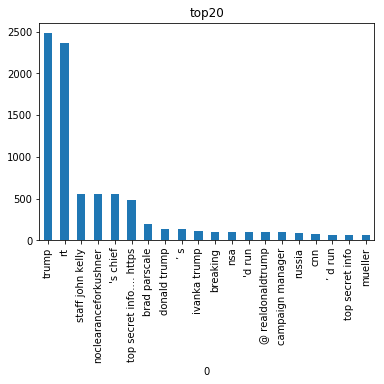

In [37]:
#Checking the top 20 nouns
import matplotlib.pyplot as plt


allword=wordlist.groupby(0).size()
top20allwords=allword.sort_values(0,ascending=False).head(20)
top20allwords.plot(kind='bar',title='top20') 
plt.show()


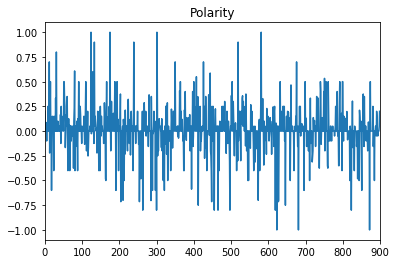

In [38]:
#Plot a sentiment graph on the tweets
polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()





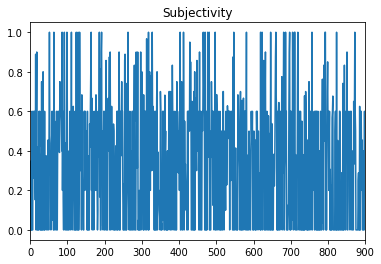

In [40]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [41]:
#Create a summary of a news article

In [42]:
pip.main(['install', 'requests'])
pip.main(["install","newspaper3k"])
import newspaper
from newspaper import Article
from  textblob import TextBlob

  Using cached newspaper3k-0.2.6.tar.gz
  Using cached cssselect-1.0.3-py2.py3-none-any.whl
  Using cached feedparser-5.2.1.zip
  Using cached tldextract-2.2.0-py2.py3-none-any.whl
  Using cached feedfinder2-0.0.4.tar.gz
  Using cached jieba3k-0.35.1.zip
  Using cached requests_file-1.4.3-py2.py3-none-any.whl
  Running setup.py bdist_wheel for newspaper3k: started
  Running setup.py bdist_wheel for newspaper3k: finished with status 'done'
  Stored in directory: C:\Users\kalp\AppData\Local\pip\Cache\wheels\d1\38\04\48031b2f399b5f18b7f90b74419acf264bf05057c05164a99e
  Running setup.py bdist_wheel for feedparser: started
  Running setup.py bdist_wheel for feedparser: finished with status 'done'
  Stored in directory: C:\Users\kalp\AppData\Local\pip\Cache\wheels\15\ce\10\b500f745822ea6db6ea8ed225c06b15c000d71016b89ef9037
  Running setup.py bdist_wheel for feedfinder2: started
  Running setup.py bdist_wheel for feedfinder2: finished with status 'done'
  Stored in directory: C:\Users\kalp\Ap

In [49]:
url = 'https://www.bridgewater.com/'
article = newspaper.Article(url)
article.download()
article.parse()
article.nlp()
article.summary


In [50]:
article.title


'Bridgewater Associates, LP'

In [52]:
article.keywords


['meaningful',
 'unique',
 'work',
 'works',
 'understanding',
 'read',
 'associates',
 'world',
 'bridgewater',
 'truth',
 'principles',
 'lp',
 'radical']

In [53]:
article.summary


'We want an idea meritocracy in which meaningful work and meaningful relationships are pursued through radical truth and radical transparency.\nIt is by continually striving together for the highest levels of truth and excellence that we create meaningful work and meaningful relationships.\nWe believe that creating excellent outcomes requires setting ambitious goals and applying our understanding of how the world works, as reflected in principles, to achieve them.\nThey’re not just read and followed, but stress-tested on an individual and collective level as our shared approach to working together.\nAs Bridgewater is an idea-meritocracy in which we value independent thinking, we urge you to read and assess them for yourself.'

In [54]:
article.text


'Our unique success is the direct result of our unique way of being. We want an idea meritocracy in which meaningful work and meaningful relationships are pursued through radical truth and radical transparency. We require people to be extremely open, air disagreements, test each other’s logic, and view discovering mistakes and weaknesses as a good thing that leads to improvement and innovation. It is by continually striving together for the highest levels of truth and excellence that we create meaningful work and meaningful relationships.\n\nWe are both idealistic and practical. We believe that creating excellent outcomes requires setting ambitious goals and applying our understanding of how the world works, as reflected in principles, to achieve them. Our Principles are ways of dealing with situations. They are the evolving record of our understanding of what works well. They’re not just read and followed, but stress-tested on an individual and collective level as our shared approach 

In [55]:
blob2 = TextBlob(article.text)

In [56]:
blob2.sentences[1]    
    
wordlist = pd.DataFrame()

ssList=[]

for t in blob2.sentences:
    ww =[]
    for word, tag in t.tags:
        if tag in ('NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBP', 'VBZ'):
            ww.append(word.lemmatize())
            
    ss = ' '.join(ww)
    
    ssList.append(ss.lower())

wordlist=wordlist.append(ssList, ignore_index=True)

wordlist


,0
0,success is result way being
1,want idea meritocracy work relationship are tr...
2,require people be air disagreement test s logi...
3,is striving level truth excellence create work...
4,are
5,believe creating outcome requires setting goal...
6,principles are way dealing situation
7,are evolving record understanding work
8,’ read followed level approach working
9,bridgewater is idea-meritocracy value thinking...


In [ ]:
wordlist.to_csv('summary1.csv') #Converting into csv
